In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings(action='ignore')

!python -V
# print(sklearn.__version__)

Python 3.8.8


In [33]:
df = pd.read_csv('Egnatia_st.csv', sep=',') # parse_dates = ['date_time'], index_col = ['date_time']

# Converting date_time format 
df['date_time'] = df['date_time'].astype('datetime64[ns]')
df['year'] = df['date_time'].dt.year

df.dropna(axis=0, how='any', inplace=True)

df

,osm_id,date_time,link_dir,speed_kmph,n_time,hours,mins,n_day,stores,n_month,highway,road_lt_m,bus_stop,year
0,14904476,2018-01-01 00:00:00,1,33,00:00,0,0,2,0,1,primary,96,no,2018
1,14904476,2018-01-01 00:15:00,1,20,00:15,0,15,2,0,1,primary,96,no,2018
2,14904476,2018-01-01 00:45:00,1,32,00:45,0,45,2,0,1,primary,96,no,2018
3,14904476,2018-01-01 01:00:00,1,12,01:00,1,0,2,0,1,primary,96,no,2018
4,14904476,2018-01-01 01:15:00,1,9,01:15,1,15,2,0,1,primary,96,no,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907016,442167476,2022-02-28 23:00:00,1,19,23:00,23,0,2,0,2,primary,107,no,2022
907017,442167476,2022-02-28 23:15:00,1,32,23:15,23,15,2,0,2,primary,107,no,2022
907018,442167476,2022-02-28 23:30:00,1,30,23:30,23,30,2,0,2,primary,107,no,2022
907019,442167476,2022-02-28 23:45:00,1,22,23:45,23,45,2,0,2,primary,107,no,2022


In [34]:
df['osm_id'].value_counts()

112282656    139731
35355049     138383
174486699    134320
302472924    130008
14904476     128739
442167476    126967
113342145    108873
Name: osm_id, dtype: int64

<AxesSubplot:xlabel='date_time', ylabel='speed_kmph'>

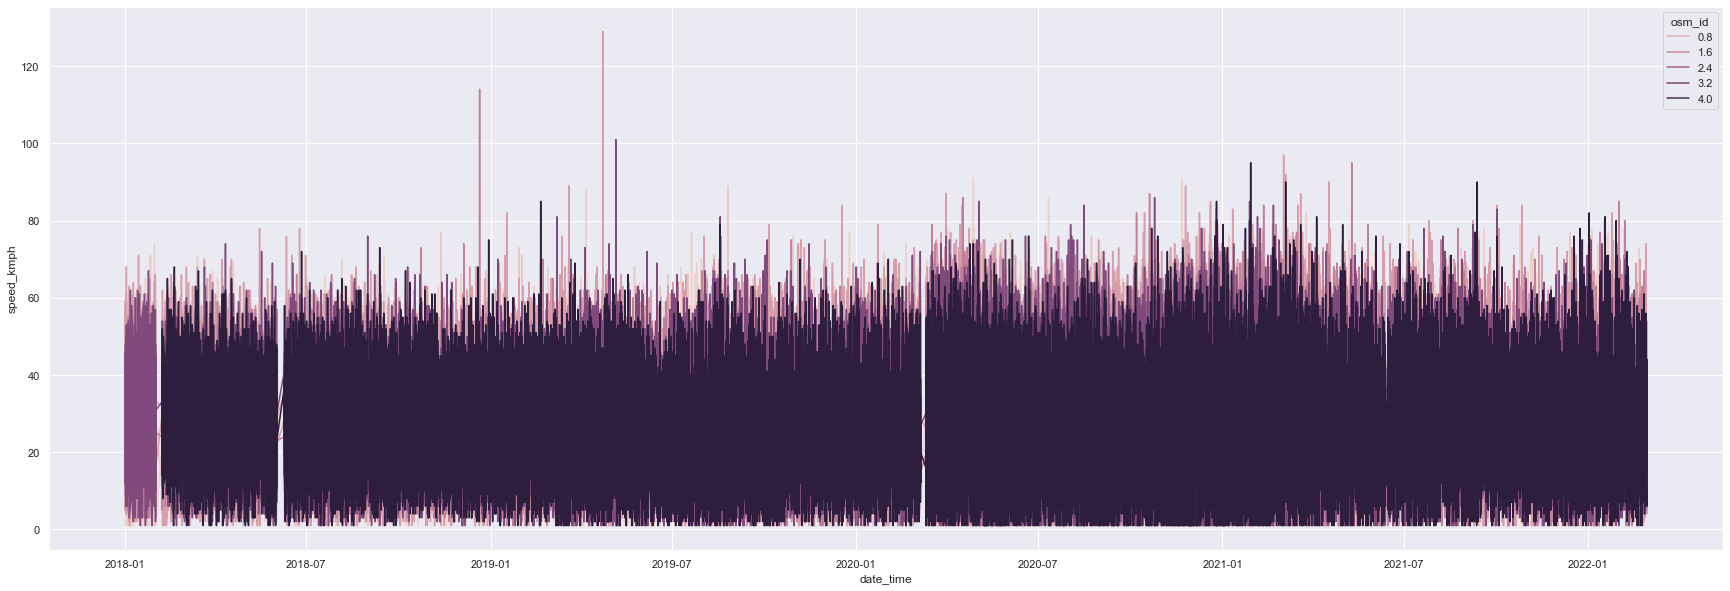

In [35]:
# plt.figure(figsize=(30,10))
# plt.plot(df['speed_kmph'])
# plt.title('Speed Value in Km/h')
# # plt.show()

sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(x=df['date_time'], y=df['speed_kmph'], hue=df['osm_id'])

In [36]:
# filter the data for processing 
df = df.loc[df['year'] == 2018] 
df = df.loc[df['osm_id'] == 35355049]

#greater than the start date and smaller than the end date
mask = (df['date_time'] > '2018-01-01 00:00:00') & (df['date_time'] <= '2018-02-01 00:00:00') # selection format 2018-01-01 10:15:00
df = df.loc[mask]
df

,osm_id,date_time,link_dir,speed_kmph,n_time,hours,mins,n_day,stores,n_month,highway,road_lt_m,bus_stop,year
128740,35355049,2018-01-01 00:15:00,1,41,00:15,0,15,2,0,1,primary,165,no,2018
128741,35355049,2018-01-01 00:30:00,1,35,00:30,0,30,2,0,1,primary,165,no,2018
128742,35355049,2018-01-01 00:45:00,1,32,00:45,0,45,2,0,1,primary,165,no,2018
128743,35355049,2018-01-01 01:00:00,1,26,01:00,1,0,2,0,1,primary,165,no,2018
128744,35355049,2018-01-01 01:15:00,1,15,01:15,1,15,2,0,1,primary,165,no,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131680,35355049,2018-01-31 23:00:00,1,29,23:00,23,0,4,0,1,primary,165,no,2018
131681,35355049,2018-01-31 23:15:00,1,22,23:15,23,15,4,0,1,primary,165,no,2018
131682,35355049,2018-01-31 23:30:00,1,26,23:30,23,30,4,0,1,primary,165,no,2018
131683,35355049,2018-01-31 23:45:00,1,38,23:45,23,45,4,0,1,primary,165,no,2018


15 minutes = 4 step/hour
24 * 4 * 32 =  3072

Available:
2945/3072

In [227]:
# Trying to add data gap

ndf = df.set_index('date_time')
ndf = ndf.resample('15T').interpolate()
ndf

,osm_id,link_dir,speed_kmph,n_time,hours,mins,n_day,stores,n_month,highway,road_lt_m,bus_stop,year
date_time,,,,,,,,,,,,,
2018-01-01 00:15:00,35355049.0,1.0,41.0,00:15,0.0,15.0,2.0,0.0,1.0,primary,165.0,no,2018.0
2018-01-01 00:30:00,35355049.0,1.0,35.0,00:30,0.0,30.0,2.0,0.0,1.0,primary,165.0,no,2018.0
2018-01-01 00:45:00,35355049.0,1.0,32.0,00:45,0.0,45.0,2.0,0.0,1.0,primary,165.0,no,2018.0
2018-01-01 01:00:00,35355049.0,1.0,26.0,01:00,1.0,0.0,2.0,0.0,1.0,primary,165.0,no,2018.0
2018-01-01 01:15:00,35355049.0,1.0,15.0,01:15,1.0,15.0,2.0,0.0,1.0,primary,165.0,no,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31 23:00:00,35355049.0,1.0,29.0,23:00,23.0,0.0,4.0,0.0,1.0,primary,165.0,no,2018.0
2018-01-31 23:15:00,35355049.0,1.0,22.0,23:15,23.0,15.0,4.0,0.0,1.0,primary,165.0,no,2018.0
2018-01-31 23:30:00,35355049.0,1.0,26.0,23:30,23.0,30.0,4.0,0.0,1.0,primary,165.0,no,2018.0


<AxesSubplot:xlabel='date_time', ylabel='speed_kmph'>

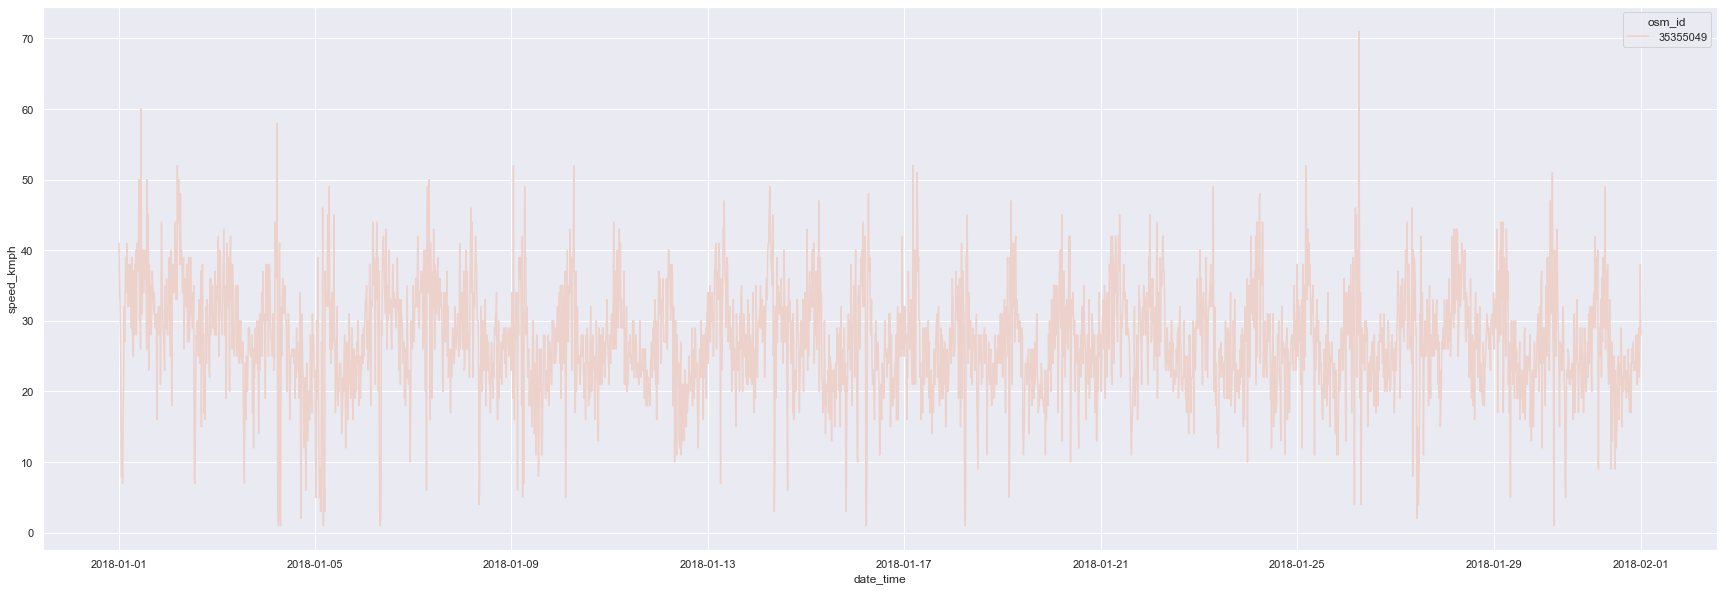

In [37]:
# plt.figure(figsize=(30,10))
# plt.plot(df['speed_kmph'])
# plt.title('Speed Value in Km/h')
# plt.show()

sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(x=df['date_time'], y=df['speed_kmph'], hue=df['osm_id']) 

In [38]:
# Split df into X and y
# selecting the prediction target (label)
y = df.speed_kmph
    
# convert all the features with label encoder
df['n_time_n'] = LabelEncoder().fit_transform(df['n_time'])
# df['n_day_n'] = LabelEncoder().fit_transform(df['n_day'])
# df['n_month_n'] = LabelEncoder().fit_transform(df['n_month'])
# df['stores_n'] = LabelEncoder().fit_transform(df['stores'])
df['highway_n'] = LabelEncoder().fit_transform(df['highway'])
df['bus_stop_n'] = LabelEncoder().fit_transform(df['bus_stop'])

# selecting the 'features', depending on the data
# data_features = ['osm_id', 'hours', 'mins', 'n_day', 'n_month', 'stores','road_lt_m', 'bus_stop_n']
# data_features = ['osm_id', 'hours', 'mins', 'n_day', 'stores','road_lt_m', 'bus_stop_n']
# data_features = ['osm_id', 'hours', 'mins', 'n_day_n', 'n_month_n', 'stores_n', 'road_lt_m']
data_features = ['hours', 'mins', 'n_day', 'n_month', 'stores']
# data_features = ['osm_id', 'hours', 'mins', 'stores','road_lt_m', 'bus_stop_n']
X = df[data_features]

X.head()

,hours,mins,n_day,n_month,stores
128740,0,15,2,1,0
128741,0,30,2,1,0
128742,0,45,2,1,0
128743,1,0,2,1,0
128744,1,15,2,1,0


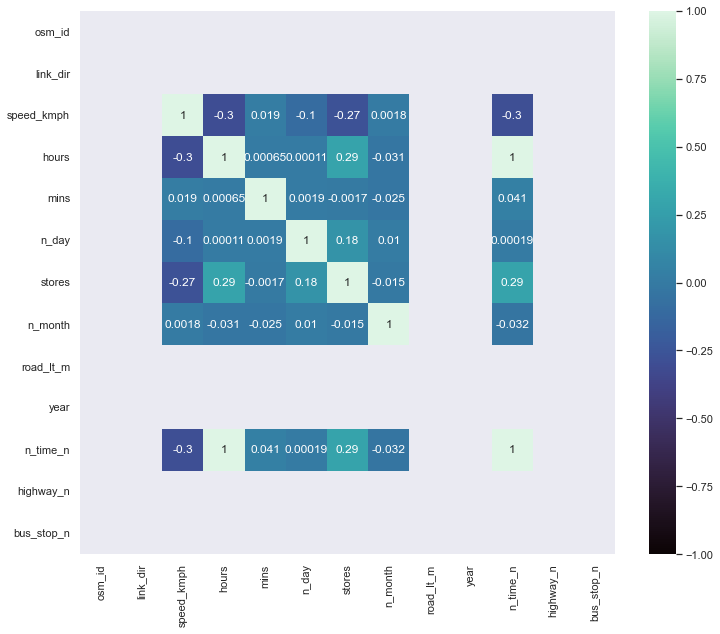

In [39]:
# Visualizing Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [40]:
# Inspect the data
print('DATA INSPECTION RESULTS:')
print('time values:', df['n_time_n'].unique())
print('day values:', df['n_day'].unique())
print('month values:', df['n_month'].unique())
print('stores values:', df['stores'].unique())
print('link_dir values:', df['link_dir'].unique())
print('highway values:', df['highway'].unique())

DATA INSPECTION RESULTS:
time values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95  0]
day values: [2 3 4 5 6 7 1]
month values: [1 2]
stores values: [0 2 1 3]
link_dir values: [1]
highway values: ['primary']


Text(0, 0.5, 'Speed in Km/h')

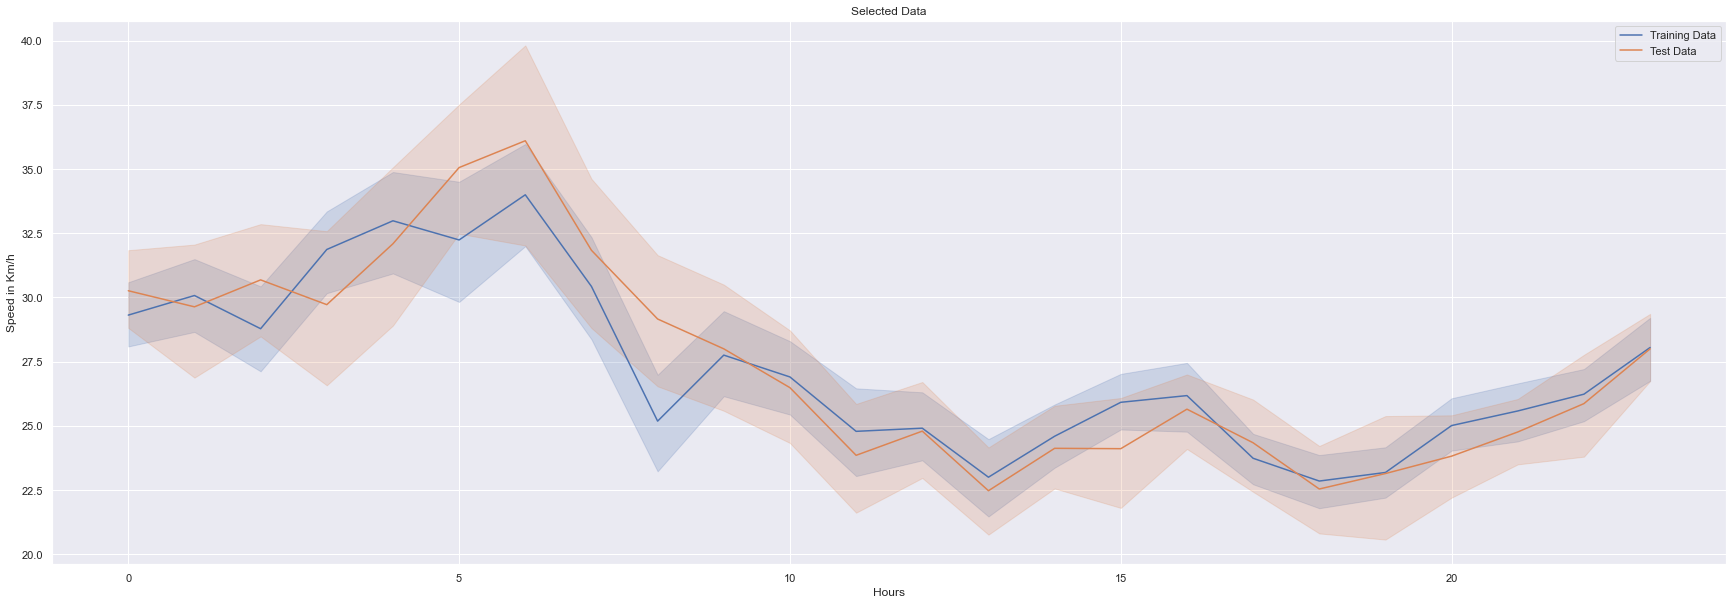

In [41]:
# Train-test split
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette("hls", 8))

ax = sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x=train_X['hours'], y=train_y, label='Training Data') # , hue=train_X['osm_id']
ax = sns.lineplot(x=val_X['hours'], y=val_y, label='Test Data') # , hue=val_X['osm_id'], palette=customPalette

# Customize the axes and title
ax.set_title("Selected Data")
ax.set_xlabel("Hours")
ax.set_ylabel("Speed in Km/h")

In [42]:
# Scale X
print('Variance before scaler:', train_X.var(), sep='\n')
print('\n')
scaler = StandardScaler()
scaler.fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), index=train_X.index, columns=train_X.columns)
val_X = pd.DataFrame(scaler.transform(val_X), index=val_X.index, columns=val_X.columns)

print('Variance after scaler:', train_X.var(), sep='\n')
print('\n')

print(train_X)
print(val_X)
print(train_y)
print(val_y)

Variance before scaler:
hours       47.733211
mins       282.665875
n_day        3.692610
n_month      0.000000
stores       0.610217
dtype: float64


Variance after scaler:
hours      1.000485
mins       1.000485
n_day      1.000485
n_month    0.000000
stores     1.000485
dtype: float64


           hours      mins     n_day  n_month    stores
128873 -0.220078 -1.360900 -0.462938      0.0  0.475277
131655  0.648575  1.316302  0.057583      0.0  0.475277
130150  1.082901 -1.360900 -0.983460      0.0  3.036179
129635 -0.220078 -1.360900  0.057583      0.0  0.475277
130345  1.227677 -0.468500  0.057583      0.0 -0.805175
...          ...       ...       ...      ...       ...
131503 -1.378282  1.316302 -0.462938      0.0 -0.805175
129645  0.069473  0.423901  0.057583      0.0  0.475277
129836  0.069473 -0.468500  1.098626      0.0  0.475277
128975 -0.075303  1.316302  0.057583      0.0  0.475277
129801 -1.233507  0.423901  1.098626      0.0 -0.805175

[2061 rows x 5 columns]
           h

# Model Links
- LR    : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- KNN   : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor#sklearn.neighbors.KNeighborsRegressor
- SVR   : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html or https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
- DT    : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- RF    : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- GB    : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [43]:
# Comparing the models 
models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(), # max_iter=500
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(), # max_features="log2", random_state=0
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(train_X, train_y)
    print(name + " trained.")

                     Linear Regression trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [12]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(val_X, val_y)))
    print(name + " R^2 Score: {:.5f}".format(model.score(train_X, train_y)))

                     Linear Regression R^2 Score: 0.12870
                     Linear Regression R^2 Score: 0.12913
                   K-Nearest Neighbors R^2 Score: 0.14155
                   K-Nearest Neighbors R^2 Score: 0.35757
                        Neural Network R^2 Score: 0.14675
                        Neural Network R^2 Score: 0.15350
Support Vector Machine (Linear Kernel) R^2 Score: 0.13055
Support Vector Machine (Linear Kernel) R^2 Score: 0.12753
   Support Vector Machine (RBF Kernel) R^2 Score: 0.21565
   Support Vector Machine (RBF Kernel) R^2 Score: 0.19096
                         Decision Tree R^2 Score: -0.24531
                         Decision Tree R^2 Score: 0.47929
                         Random Forest R^2 Score: -0.06572
                         Random Forest R^2 Score: 0.47179
                     Gradient Boosting R^2 Score: 0.23746
                     Gradient Boosting R^2 Score: 0.26858


In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

for name, model in models.items():
    val_predict = model.predict(val_X)
    print(name + " R^2 Score: {:.5f}".format(r2_score(val_y, val_predict)))
    print(name + " RMSE: {:.5f}".format(np.sqrt(mean_squared_error(val_y, val_predict))))
    print(name + " MAE: {:.5f}".format(mean_absolute_error(val_y, val_predict)))

                     Linear Regression R^2 Score: 0.12870
                     Linear Regression RMSE: 7.39972
                     Linear Regression MAE: 5.49871
                   K-Nearest Neighbors R^2 Score: 0.14155
                   K-Nearest Neighbors RMSE: 7.34493
                   K-Nearest Neighbors MAE: 5.38235
                        Neural Network R^2 Score: 0.15262
                        Neural Network RMSE: 7.29744
                        Neural Network MAE: 5.34167
Support Vector Machine (Linear Kernel) R^2 Score: 0.13017
Support Vector Machine (Linear Kernel) RMSE: 7.39347
Support Vector Machine (Linear Kernel) MAE: 5.48561
   Support Vector Machine (RBF Kernel) R^2 Score: 0.21565
   Support Vector Machine (RBF Kernel) RMSE: 7.02079
   Support Vector Machine (RBF Kernel) MAE: 5.06796
                         Decision Tree R^2 Score: -0.24531
                         Decision Tree RMSE: 8.84644
                         Decision Tree MAE: 6.28922
                     

In [45]:
# Specifying and creating the MODEL
# Change the model accordingly!
data_model = GradientBoostingRegressor()
data_model.fit(train_X, train_y)

GradientBoostingRegressor()

In [46]:
# PREDICTING and VALIDATING the values
val_predictions = data_model.predict(val_X)

print('R^2 Score =', r2_score(val_y, val_predictions))
print('Mean Absolute Error =', mean_absolute_error(val_y, val_predictions))
print('Root Mean Squared Error =', np.sqrt(mean_squared_error(val_y, val_predictions)))

# Implementing Cross Validation techniques
from sklearn.model_selection import cross_val_score
scores = cross_val_score(data_model, train_X, train_y, cv=10)
scores

R^2 Score = 0.237455723480971
Mean Absolute Error = 5.000869238417848
Root Mean Squared Error = 6.922506518799516


array([ 0.2529198 ,  0.21212193,  0.24200555,  0.23881364,  0.27447645,
        0.17098828, -0.00763951,  0.15009952,  0.1786042 ,  0.24179391])

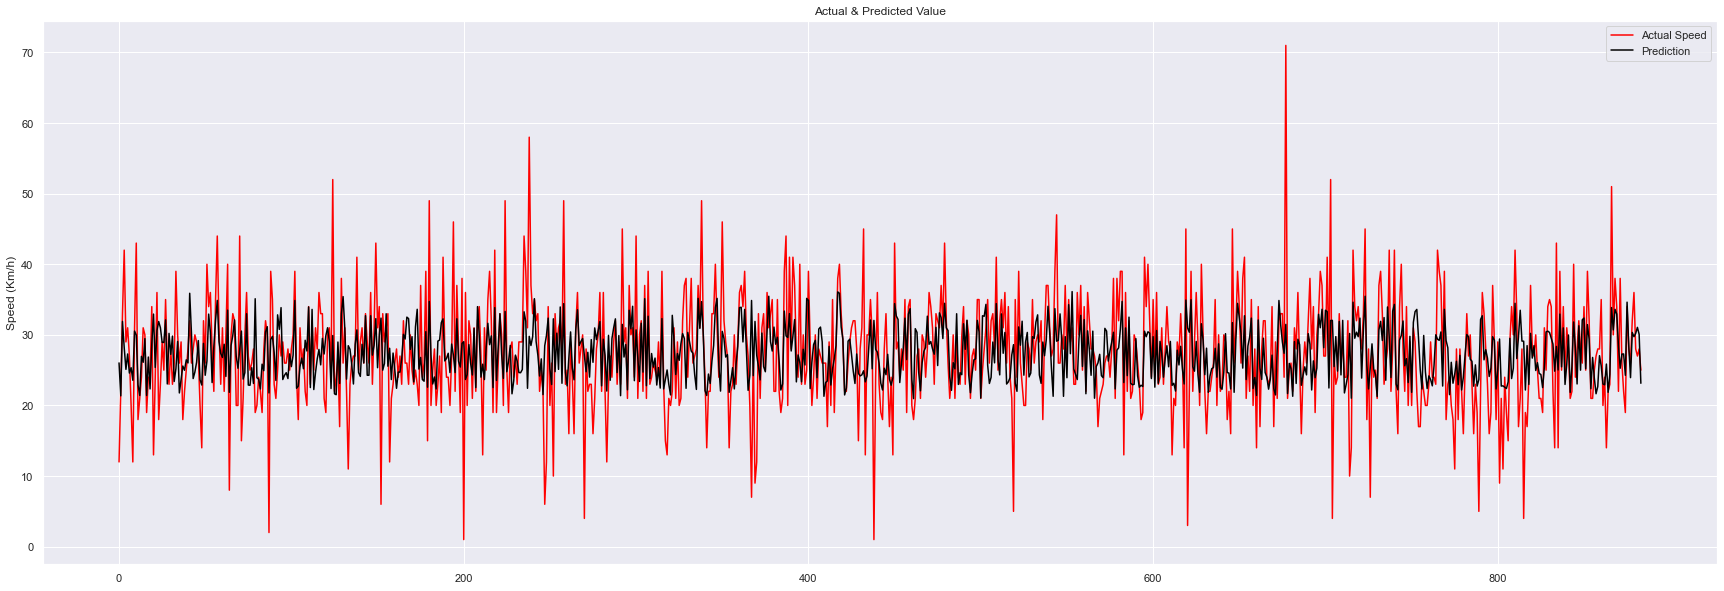

In [47]:
plt.figure(figsize=(30,10))
n=len(val_y)
plt.plot(range(n), val_y, color = 'red', label = 'Actual Speed')
plt.plot(range(n), val_predictions, color = 'black', label = 'Prediction')
plt.legend(loc = 'best')
plt.ylabel('Speed (Km/h)')
plt.title('Actual & Predicted Value')
plt.show()

In [48]:
# Inverse transform the X data for plot

print('Before Inverse Scaler:')
print("Training Data", train_X)
print("Test Data", val_X)

train_X = pd.DataFrame(scaler.inverse_transform(train_X), index=train_X.index, columns=train_X.columns)
val_X = pd.DataFrame(scaler.inverse_transform(val_X), index=val_X.index, columns=val_X.columns)

print("After Inverse Scaler:")
print("Training Data", train_X)
print("Test Data", val_X)

Before Inverse Scaler:
Training Data            hours      mins     n_day  n_month    stores
128873 -0.220078 -1.360900 -0.462938      0.0  0.475277
131655  0.648575  1.316302  0.057583      0.0  0.475277
130150  1.082901 -1.360900 -0.983460      0.0  3.036179
129635 -0.220078 -1.360900  0.057583      0.0  0.475277
130345  1.227677 -0.468500  0.057583      0.0 -0.805175
...          ...       ...       ...      ...       ...
131503 -1.378282  1.316302 -0.462938      0.0 -0.805175
129645  0.069473  0.423901  0.057583      0.0  0.475277
129836  0.069473 -0.468500  1.098626      0.0  0.475277
128975 -0.075303  1.316302  0.057583      0.0  0.475277
129801 -1.233507  0.423901  1.098626      0.0 -0.805175

[2061 rows x 5 columns]
Test Data            hours      mins     n_day  n_month    stores
130601  0.214248 -0.468500  1.619148      0.0  0.475277
130508  0.214248  1.316302  1.098626      0.0  0.475277
131338 -0.364854  0.423901 -1.503981      0.0 -0.805175
128932 -1.667833  1.316302  0.05

Text(0, 0.5, 'Speed (Km/h)')

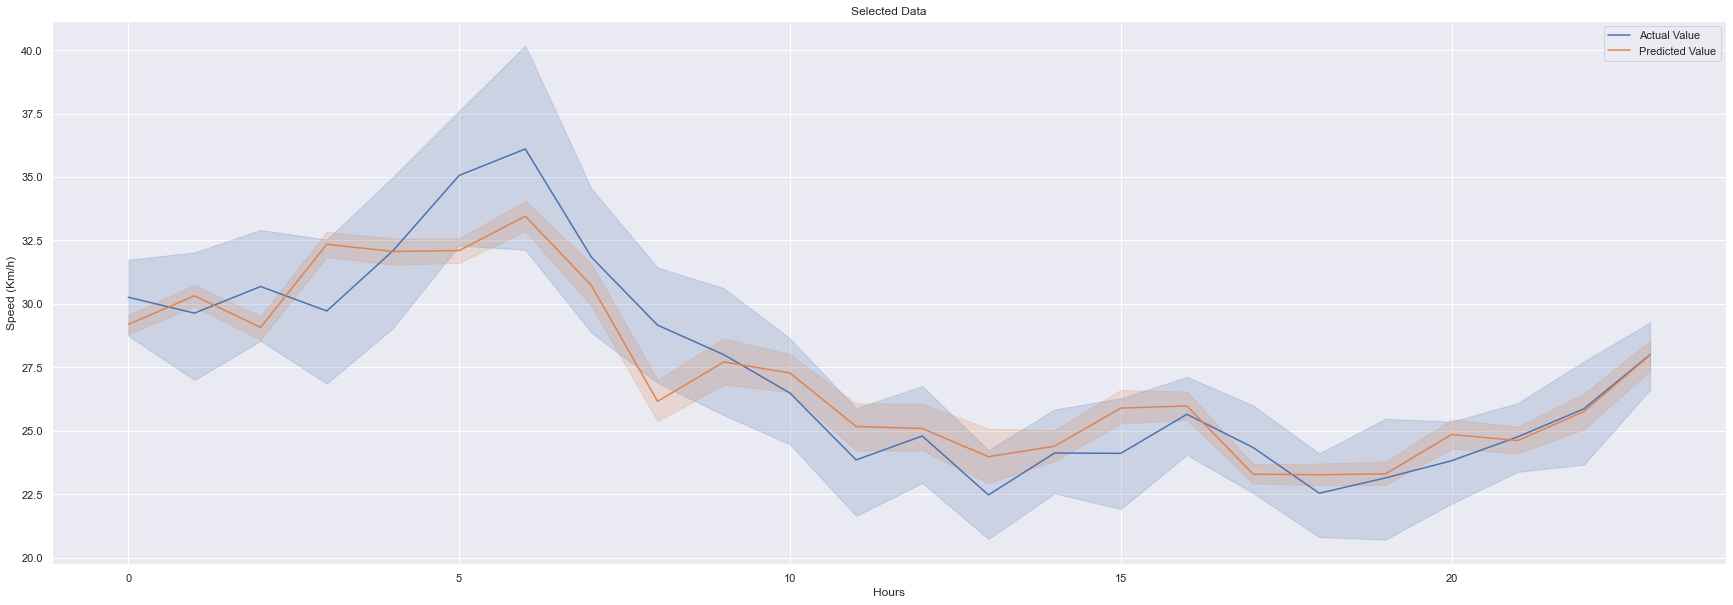

In [49]:
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette("hls", 8))

ax = sns.set(rc={'figure.figsize':(30,10)})
ax = sns.lineplot(x=val_X['hours'], y=val_y, label='Actual Value') # , hue=train_X['osm_id']
ax = sns.lineplot(x=val_X['hours'], y=val_predict, label='Predicted Value') # , hue=val_X['osm_id'], palette=customPalette

# Customize the axes and title
ax.set_title("Selected Data")
ax.set_xlabel("Hours")
ax.set_ylabel("Speed (Km/h)")